In [9]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
df = pd.read_csv('/Users/saudahmad/Desktop/market_basket_data.csv')
df.head(3)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# !pip install missingno
df.columns
df = df.drop(['antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'], axis=1)

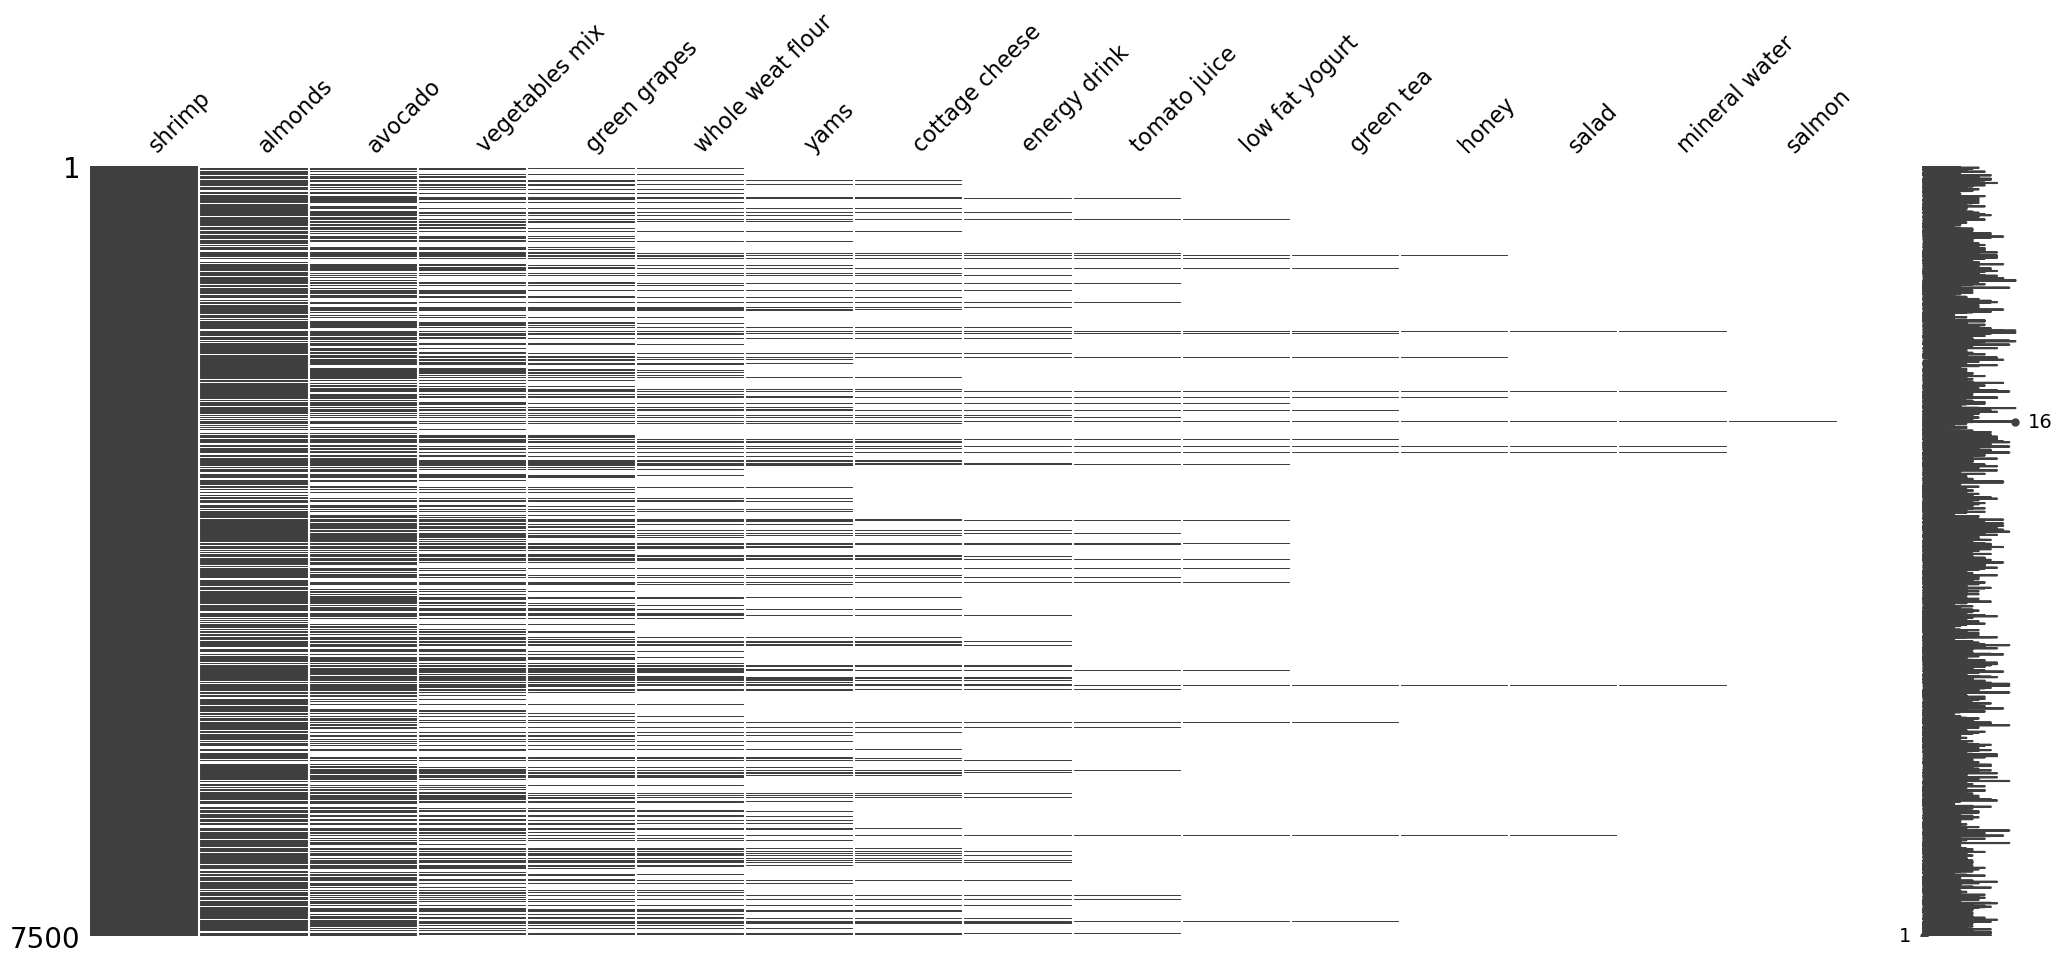

In [11]:
# Visualize missing values matrix
msno.matrix(df)
plt.show()

In [12]:
df.describe()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon
count,7500,5746,4388,3344,2528,1863,1368,980,653,394,255,153,86,46,24,7
unique,115,117,115,114,110,106,102,98,88,80,66,50,42,28,18,7
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,chocolate
freq,577,484,375,201,153,107,96,67,57,31,21,14,8,4,3,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   shrimp            7500 non-null   object
 1   almonds           5746 non-null   object
 2   avocado           4388 non-null   object
 3   vegetables mix    3344 non-null   object
 4   green grapes      2528 non-null   object
 5   whole weat flour  1863 non-null   object
 6   yams              1368 non-null   object
 7   cottage cheese    980 non-null    object
 8   energy drink      653 non-null    object
 9   tomato juice      394 non-null    object
 10  low fat yogurt    255 non-null    object
 11  green tea         153 non-null    object
 12  honey             86 non-null     object
 13  salad             46 non-null     object
 14  mineral water     24 non-null     object
 15  salmon            7 non-null      object
dtypes: object(16)
memory usage: 937.6+ KB


In [14]:
# Flatten the DataFrame into a single list of items
all_items = df.values.flatten()

In [15]:
all_items = pd.DataFrame(all_items)
all_items[0].count()

29335

In [16]:
new_columns= all_items[0].unique()
new_columns = np.delete(new_columns, 3)
new_columns

array(['burgers', 'meatballs', 'eggs', 'chutney', 'turkey', 'avocado',
       'mineral water', 'milk', 'energy bar', 'whole wheat rice',
       'green tea', 'low fat yogurt', 'whole wheat pasta', 'french fries',
       'soup', 'light cream', 'shallot', 'frozen vegetables', 'spaghetti',
       'pet food', 'cookies', 'cooking oil', 'champagne', 'salmon',
       'shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'fresh tuna',
       'tomatoes', 'black tea', 'extra dark chocolate', 'protein bar',
       'red wine', 'pasta', 'pepper', 'shampoo', 'rice',
       'sparkling water', 'ham', 'body spray', 'pancakes',
       'grated cheese', 'white wine', 'toothpaste', 'parmesan cheese',
       'fresh bread', 'ground beef', 'frozen smoothie', 'escalope',
       'yams', 'herb & pepper', 'tomato sauce', 'magazines',
       'strawberries', 'strong cheese', 'pickles', 'cake',
       'cottage cheese', 'hot dogs', 'brownies', 'cereals',
       'clothes accessories', 'bug spray', 'muffins', 'light mayo',


In [71]:
df2 = [new_columns]
df2 = pd.DataFrame(df2)
df2.columns = new_columns
df2 = df2.drop(index=0)

In [1]:
df2

NameError: name 'df2' is not defined

In [77]:
for a in df.index:
    for i in df2.columns:
        for j in df.columns:
            if df.loc[a,j] == i:
                df2.loc[a,i] = 1

In [78]:
# !pip install mlxtend
# df2.loc[:, :] = 0
df2

,burgers,meatballs,eggs,chutney,turkey,avocado,mineral water,milk,energy bar,whole wheat rice,...,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins,whole weat flour
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the apriori algorithm
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)



/Users/saudahmad/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [83]:
print("Frequent Itemsets:")
frequent_itemsets

Frequent Itemsets:


,support,itemsets
0,0.0872,(burgers)
1,0.020933,(meatballs)
2,0.179733,(eggs)
3,0.062533,(turkey)
4,0.0332,(avocado)
...,...,...
254,0.011467,"(pancakes, mineral water, spaghetti)"
255,0.017067,"(ground beef, mineral water, spaghetti)"
256,0.010267,"(olive oil, mineral water, spaghetti)"
257,0.010933,"(chocolate, ground beef, mineral water)"


In [84]:
print("\nAssociation Rules:")
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
1,(eggs),(burgers),0.179733,0.087200,0.028800,0.160237,1.837585,0.013127,1.086974,0.555682
2,(turkey),(burgers),0.062533,0.087200,0.010667,0.170576,1.956143,0.005214,1.100522,0.521395
3,(burgers),(turkey),0.087200,0.062533,0.010667,0.122324,1.956143,0.005214,1.068124,0.535484
4,(burgers),(mineral water),0.087200,0.238267,0.024400,0.279817,1.174384,0.003623,1.057693,0.162675
...,...,...,...,...,...,...,...,...,...,...
403,"(chocolate, milk)",(spaghetti),0.032133,0.174133,0.010933,0.340249,1.953957,0.005338,1.251785,0.504427
404,"(spaghetti, milk)",(chocolate),0.035467,0.163867,0.010933,0.308271,1.881229,0.005122,1.208758,0.485657
405,(chocolate),"(spaghetti, milk)",0.163867,0.035467,0.010933,0.066721,1.881229,0.005122,1.033489,0.560237
406,(spaghetti),"(chocolate, milk)",0.174133,0.032133,0.010933,0.062787,1.953957,0.005338,1.032707,0.591158


In [ ]:
using .time to calculate time for FB tree and Apriori
exploring the theoritical side